# Dashboard
You’re participating in a brand new game show called “Seal or No Seal”. Your goal is to choose up to three suitcases and take home the most treasure. Each suitcase holds at least 10.000 SeaShells, with multipliers showing you exactly how much SeaShells are in the suitcase. Select your preferred suitcase(s) by clicking on them. There’s a catch though: there might be costs involved in opening these containers and you are not the only one looking to win big. You’ll have to share your prize with everyone else that chooses the same suitcase. Now that you know the rules of the game, it’s time to choose your lucky numbers!
# wiki
You’re participating in a brand new game show and have the opportunity to open up a maximum of three suitcases with great prizes in them. The whole archipelago is participating, so you’ll have to share the spoils with everyone choosing the same suitcase. Opening one suitcase is free, but for the second and third one you’ll need to pay to get inside. 

Here's a breakdown of how your profit from a suitcase will be computed:
Every suitcase has its **prize multiplier** (up to 100) and number of **inhabitants** (up to 15) that will be choosing that particular suitcase. The suitcase’s total treasure is the product of the **base treasure** (10 000, same for all suitcases) and the suitcase’s specific treasure multiplier. However, the resulting amount is then divided by the sum of the inhabitants that choose the same suitcase and the percentage of opening this specific suitcase of the total number of times a suitcase has been opened (by all players). 

For example, if **5 inhabitants** choose a suitcase, and **this suitcase was chosen** **10% of the total number of times a suitcase has been opened** (by all players), the prize you get from that suitcase will be divided by 15. After the division, **costs for opening a suitcase** apply (if there are any), and profit is what remains.

To help you with your decision making, here's the distribution of player's choices from **Round 2** Manual:

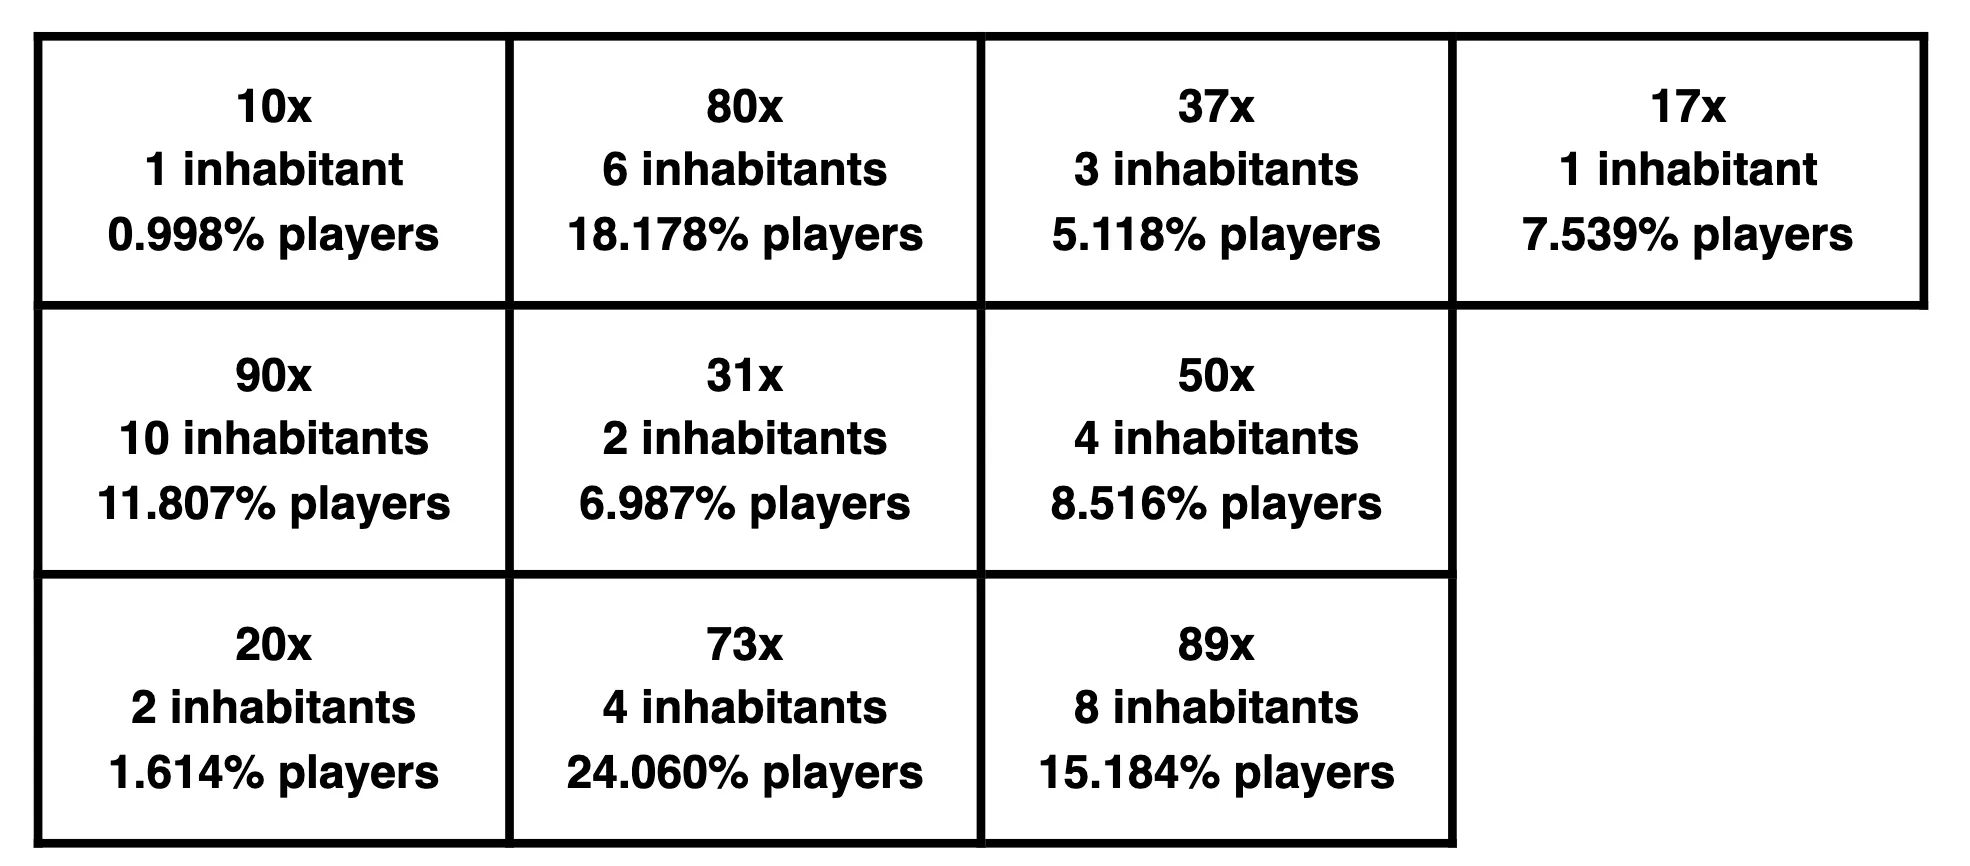

ts pretty obs a nash eq like round 2

profit = 10,000 * multiplier / (percentage + inhabitants)

In [2]:
multipliers = [80, 50, 83, 31, 60, 89, 10, 37, 70, 90, 17, 40, 73, 100, 20, 41, 79, 23, 47, 30]
inhabitants = [6, 4, 7, 2, 4, 8, 1, 3, 4, 10, 1, 3, 4, 15, 2, 3, 5, 2, 3, 2]

0

In [16]:
fair_profit = sum(multipliers) * 10000 / (sum(inhabitants) + 100)
print("Fair profit: ", fair_profit)

Fair profit:  56613.75661375662


In [47]:
def get_fair_player_percentage(multiplier, inhabitants):
    return (multiplier * 10000 / fair_profit - inhabitants) / 100
fair_player_percentages = [get_fair_player_percentage(multipliers[i], inhabitants[i]) for i in range(len(multipliers))]

print("Fair player percentages: ", fair_player_percentages)
print("Fair player percentages sum: ", sum(fair_player_percentages))

Fair player percentages:  [0.08130841121495326, 0.048317757009345784, 0.07660747663551401, 0.034757009345794385, 0.06598130841121495, 0.07720560747663549, 0.007663551401869157, 0.035355140186915886, 0.0836448598130841, 0.058971962616822415, 0.020028037383177568, 0.04065420560747663, 0.08894392523364486, 0.026635514018691565, 0.015327102803738314, 0.042420560747663545, 0.08954205607476634, 0.020626168224299066, 0.05301869158878505, 0.03299065420560748]
Fair player percentages sum:  0.9999999999999999


Weighted random index: 16


Weighted random index: 12


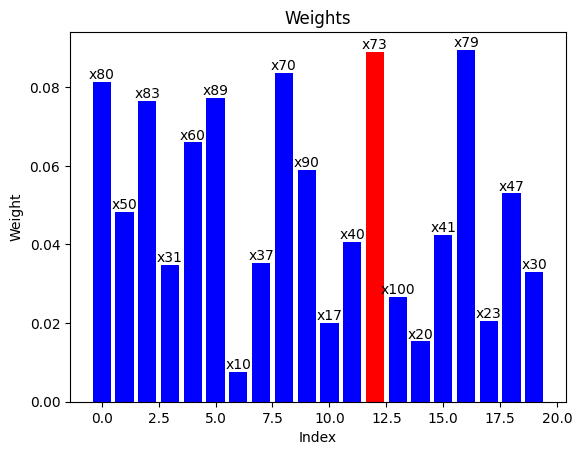

In [61]:
import matplotlib.pyplot as plt
import random

index = random.choices(range(len(fair_player_percentages)), weights=fair_player_percentages)[0]
print("Weighted random index:", index)

colors = ['blue'] * len(fair_player_percentages)
colors[index] = 'red'

plt.bar(range(len(fair_player_percentages)), fair_player_percentages, color=colors)
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Weights')

for i, multiplier in enumerate(multipliers):
    plt.text(i, fair_player_percentages[i], "x" + str(multiplier), ha='center', va='bottom')

plt.show()

[133333.33333333334, 125000.0, 118571.42857142857, 155000.0, 150000.0, 111250.0, 100000.0, 123333.33333333333, 175000.0, 90000.0, 170000.0, 133333.33333333334, 182500.0, 66666.66666666667, 100000.0, 136666.66666666666, 158000.0, 115000.0, 156666.66666666666, 150000.0]


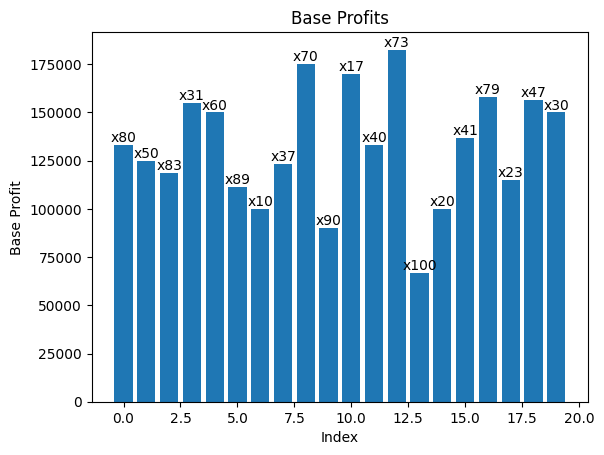

In [62]:
base_profits = [10000 * multipliers[i] / inhabitants[i] for i in range(len(multipliers))]
plt.bar(range(len(base_profits)), base_profits)
plt.xlabel('Index')
plt.ylabel('Base Profit')
plt.title('Base Profits')

for i, profit in enumerate(base_profits):
    plt.text(i, profit, "x"+str(multipliers[i]), ha='center', va='bottom')

plt.show()

following suitcase is 50,000, and then 100,000
50,000 is worth it

**Picked More**  
- **High multipliers:** 89×, 90× (greed bias, UI primacy/recency, dilution misperception)  
- **Round anchors:** 10×, 50× (anchoring/round‐number bias)  
- **Meta‐attractive crates:** 80×, 73× (herding “I’ll go where others avoid”)  

**Picked Less**  
- **Mid‑range multipliers:** 17×–37× (ignored “meh” options)  
- **Odd values:** 31× (neglected as “weird” round numbers)

In [ ]:
# Final verdict: buy two, skip 3rd
# optimal choice: 